# check dataloader

In [1]:
import os

import numpy as np
import pandas as pd
from pandarallel import pandarallel
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
import sys

sys.path.append("/kaggle/src/data/")
from dss_dataloader import DSSAddRolldiffDataset, DSSDataset, DSSEventDataset,DSSMeanStdsDataset


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

In [4]:
# series_df = pd.read_parquet("/kaggle/input/preprocessed_train_series_le_fold.parquet")
series_df = pd.read_parquet("kaggle/input/preprocessed_train_series_6ch_lepseudo_fold.parquet")
key_df = series_df[["series_date_key", "series_date_key_str"]].drop_duplicates()
key_df["series_id"], key_df["date"] = (
    key_df["series_date_key_str"].str.split("_", 1).str
)
key_df = key_df.drop(columns=["series_date_key_str"], axis=1)

/tmp/ipykernel_887/3397775552.py:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  key_df["series_date_key_str"].str.split("_", 1).str
/tmp/ipykernel_887/3397775552.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  key_df["series_id"], key_df["date"] = (


/kaggle/src/data/dss_dataloader.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.series_df[col] = self.series_df[col].astype(np.float32)


7703


/kaggle/src/data/dss_dataloader.py:173: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_data = torch.tensor(input_data, dtype=torch.float16)
/kaggle/src/data/dss_dataloader.py:173: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_data = torch.tensor(input_data, dtype=torch.float16)
/kaggle/src/data/dss_dataloader.py:173: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_data = torch.tensor(input_data, dtype=torch.float16)
/kaggle/src/data/dss_dataloader.py:173: UserWarning: To copy construct from a tensor, it is recommended to us

0


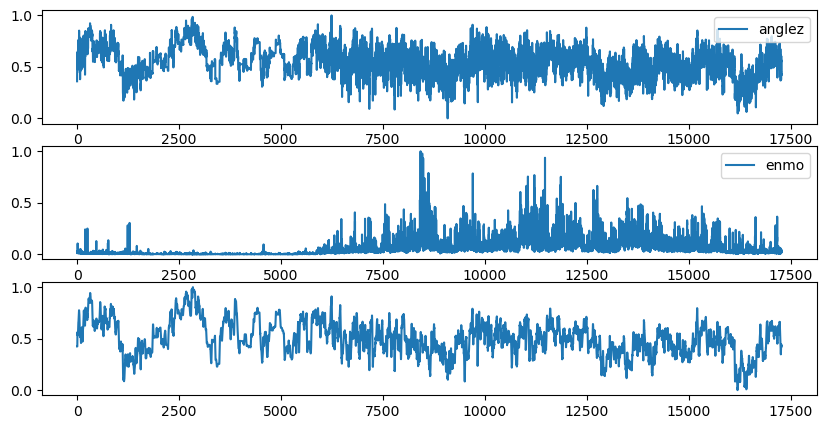

/kaggle/src/data/dss_dataloader.py:173: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_data = torch.tensor(input_data, dtype=torch.float16)
/kaggle/src/data/dss_dataloader.py:173: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_data = torch.tensor(input_data, dtype=torch.float16)
/kaggle/src/data/dss_dataloader.py:173: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_data = torch.tensor(input_data, dtype=torch.float16)
/kaggle/src/data/dss_dataloader.py:173: UserWarning: To copy construct from a tensor, it is recommended to us

1


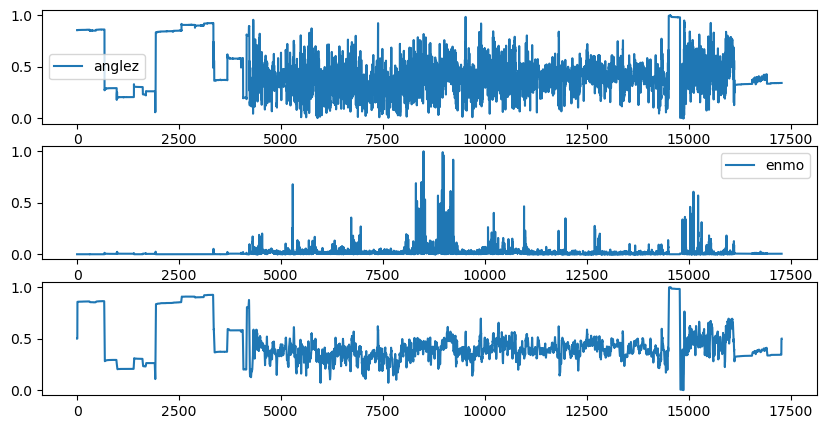

/kaggle/src/data/dss_dataloader.py:173: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_data = torch.tensor(input_data, dtype=torch.float16)
/kaggle/src/data/dss_dataloader.py:173: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_data = torch.tensor(input_data, dtype=torch.float16)
/kaggle/src/data/dss_dataloader.py:173: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_data = torch.tensor(input_data, dtype=torch.float16)
/kaggle/src/data/dss_dataloader.py:173: UserWarning: To copy construct from a tensor, it is recommended to us

2
CPU times: user 18.4 s, sys: 2.14 s, total: 20.5 s
Wall time: 6.83 s


/kaggle/src/data/dss_dataloader.py:173: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_data = torch.tensor(input_data, dtype=torch.float16)
/kaggle/src/data/dss_dataloader.py:173: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_data = torch.tensor(input_data, dtype=torch.float16)


In [6]:
%%time

# dataset = DSSAddRolldiffDataset(key_df, series_df)
# dataset = DSSDataset(key_df, series_df)
dataset = DSSMeanStdsDataset(key_df, series_df)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=0)
print(len(dataset))
show_idx = 1
for idx, (input, target, input_info) in enumerate(dataloader):
    print(idx)
    # if idx < show_idx:
    #     continue
    if idx > show_idx:
        break
    plt.figure(figsize=(10, 5))
    plt.subplot(3, 1, 1)
    plt.plot(input[0, 0, :].numpy(), label="anglez")
    plt.legend()
    plt.subplot(3, 1, 2)
    plt.plot(input[0, 1, :].numpy(), label="enmo")
    plt.legend()
    plt.subplot(3, 1, 3)
    plt.plot(input[0, 2, :].numpy(), label="class_pred")
    plt.show()
    

In [ ]:
for idx, (input, target, input_info) in enumerate(dataloader):
    if torch.isnan(input).any():
        print(idx)
        print(input)
        break
    elif torch.isnan(target).any():
        print(idx)
        print(target)
        break